# JSON and APIs

_September 22, 2020_

Agenda today:
- Introduction to API and Remote Server Model 
- Getting data through an API: Case study with YELP API

In [1]:
import pandas as pd
import numpy as np
import requests
import json
#from yelp.client import Client
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## Part I. APIs and Remote Server Model
API stands for Application Programming Interface. At some point or the other, large companies would build API for their products for their clients or internal use. It allows the company's application to communicate with another application. But what _exactly_ is an API?

#### Remote server 
When we think about the world of Web, we can think of it as a collection of _servers_. And servers are nothing but huge computers that store a huge amount of data from users and are optimized to process requests. For example, when you type in www.facebook.com, your browser sends a _request_ to the Facebook server, and gets a response from the server, thus interpreting the code and displaying your homepage. 

In this case, your browser is the _client_, and Facebook’s server is an API. To put it broadly, whenever you visit a website, you are interacting with its API. However, an API isn’t the same as the remote server — rather it is the part of the server that receives __requests__ and sends __responses__.

<img src='status-code.png' width = 500>

## Part II. Getting Data Through APIs

The `get()` method send a request to YELP's API, and stored information in a variable called `request`. Next, let's see if it's successful. 

#### YELP API
Sometimes you need _authentication_ to get data from a service in additional to just sending a `GET()` request. Yelp API is a perfect example. 

You will need to go to the YELP's developer's [website](https://www.yelp.com/developers/v3/manage_app) and request for a client ID and API key, which function like a key into a house of data. 

<img src='yelp.png' width = 500>

In [2]:
# lets try to get some data from yelp!
url = 'https://api.yelp.com/v3/businesses/search'
response = requests.get(url)

In [3]:
# check the status code
response.status_code

# what happened here?

400

In [21]:
# now we are ready to get our data 

# usually, services would limit you to a certain amount of API calls. This varies from service
# to service, so you have to watch out to it 

MY_API_KEY = "wzaVpfzDWAaJdwE78a8IRJ99QLfeWuGFae_Mm8hyXNyM52ve5c0MTqBG_lAFELXtWNImZAoqp7_qe0llZDo4KBuP30QhVh6Xx50teLTCMCDklgkYDdsIonmv2hBqX3Yx"


term = 'chinese noodles'
location = 'Chinatown, Manhattan, NY'
SEARCH_LIMIT = 50

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
response = requests.get(url, headers=headers, params=url_params)

In [22]:
# examine the response object

print(response)


<Response [200]>


In [6]:
# how are we going to parse the response.text object?

print(response.text)

{"businesses": [{"id": "X0DNGKUQPjf0AfaXfXU2Qg", "alias": "kick-axe-throwing-brooklyn-2", "name": "Kick Axe Throwing", "image_url": "https://s3-media1.fl.yelpcdn.com/bphoto/WjKylwrUBKnGIE_ldj142Q/o.jpg", "is_closed": false, "url": "https://www.yelp.com/biz/kick-axe-throwing-brooklyn-2?adjust_creative=lX2bih-ddnUYOCHmROLS0A&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=lX2bih-ddnUYOCHmROLS0A", "review_count": 399, "categories": [{"alias": "bars", "title": "Bars"}, {"alias": "axethrowing", "title": "Axe Throwing"}, {"alias": "tradamerican", "title": "American (Traditional)"}], "rating": 4.5, "coordinates": {"latitude": 40.6790268, "longitude": -73.983077}, "transactions": [], "location": {"address1": "622 Degraw St", "address2": null, "address3": "", "city": "Brooklyn", "zip_code": "11217", "country": "US", "state": "NY", "display_address": ["622 Degraw St", "Brooklyn, NY 11217"]}, "phone": "+18335425293", "display_phone": "(833) 542-5293", "distance": 4733.616620

In [24]:
# working with JSON

noodle = response.text
noodles = json.loads(noodle)

In [25]:
# cleaning and exploring the data
for key in noodles.keys():
    print(key)

businesses
total
region


In [80]:
df.coordinates

0      {'latitude': 40.715504, 'longitude': -73.996752}
1         {'latitude': 40.7142, 'longitude': -73.99787}
2      {'latitude': 40.714167, 'longitude': -73.998803}
3        {'latitude': 40.71513, 'longitude': -73.99341}
4     {'latitude': 40.7150363828814, 'longitude': -7...
5     {'latitude': 40.7184290357839, 'longitude': -7...
6        {'latitude': 40.71379, 'longitude': -73.99731}
7        {'latitude': 40.71525, 'longitude': -73.99765}
8        {'latitude': 40.71824, 'longitude': -73.99583}
9     {'latitude': 40.7193132739237, 'longitude': -7...
10    {'latitude': 40.7156608, 'longitude': -73.9967...
11     {'latitude': 40.715082, 'longitude': -73.997342}
12       {'latitude': 40.71695, 'longitude': -73.99327}
14       {'latitude': 40.72772, 'longitude': -73.98321}
16      {'latitude': 40.71583, 'longitude': -73.999336}
17    {'latitude': 40.7135318, 'longitude': -73.9948...
18     {'latitude': 40.715145, 'longitude': -73.993698}
19     {'latitude': 40.717931, 'longitude': -74.

In [112]:
MY_API_KEY = "wzaVpfzDWAaJdwE78a8IRJ99QLfeWuGFae_Mm8hyXNyM52ve5c0MTqBG_lAFELXtWNImZAoqp7_qe0llZDo4KBuP30QhVh6Xx50teLTCMCDklgkYDdsIonmv2hBqX3Yx"


term = 'chinese noodles'
location = 'Chinatown, Manhattan, NY'
SEARCH_LIMIT = 50

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
response = requests.get(url, headers=headers, params=url_params)

[Text(0, 0.5, 'Review Count'), Text(0.5, 0, 'Rating')]

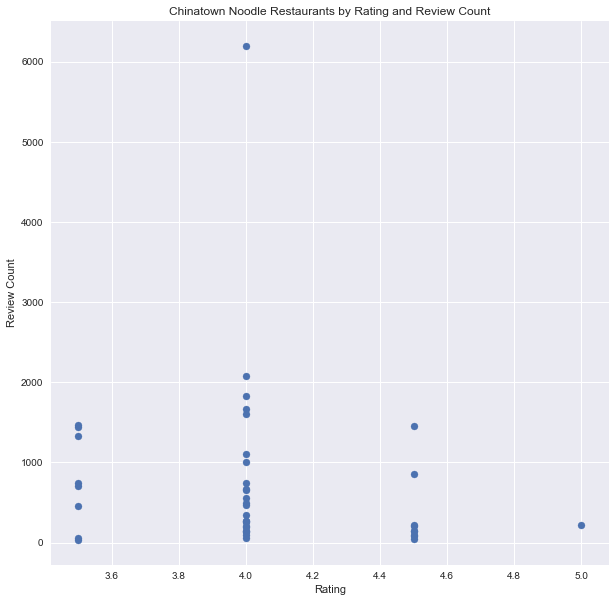

In [111]:
MY_API_KEY = "wzaVpfzDWAaJdwE78a8IRJ99QLfeWuGFae_Mm8hyXNyM52ve5c0MTqBG_lAFELXtWNImZAoqp7_qe0llZDo4KBuP30QhVh6Xx50teLTCMCDklgkYDdsIonmv2hBqX3Yx"


term = 'chinese noodles'
location = 'Chinatown, Manhattan, NY'
SEARCH_LIMIT = 50

url = 'https://api.yelp.com/v3/businesses/search'

headers = {
        'Authorization': 'Bearer {}'.format(MY_API_KEY),
    }

url_params = {
                'term': term.replace(' ', '+'),
                'location': location.replace(' ', '+'),
                'limit': SEARCH_LIMIT
            }
response = requests.get(url, headers=headers, params=url_params)
noodle = response.text
noodles = json.loads(noodle)

df = pd.DataFrame(noodles['businesses'])
df.set_index(['id'])
df.dropna(inplace = True)
df.price.replace('$', 1, inplace = True)
df.price.replace('$$', 2, inplace= True)
df.set_index('id')

fig = plt.figure(figsize= (10,10))
plt.scatter(x= df.rating, y= df.review_count)
plt.title('Chinatown Noodle Restaurants by Rating and Review Count')
fig.add_axes()
ax = fig.add_subplot(111)
ax.set(xlabel= 'Rating', ylabel= 'Review Count')

[Text(0, 0.5, 'Review Count'), Text(0.5, 0, 'Rating')]

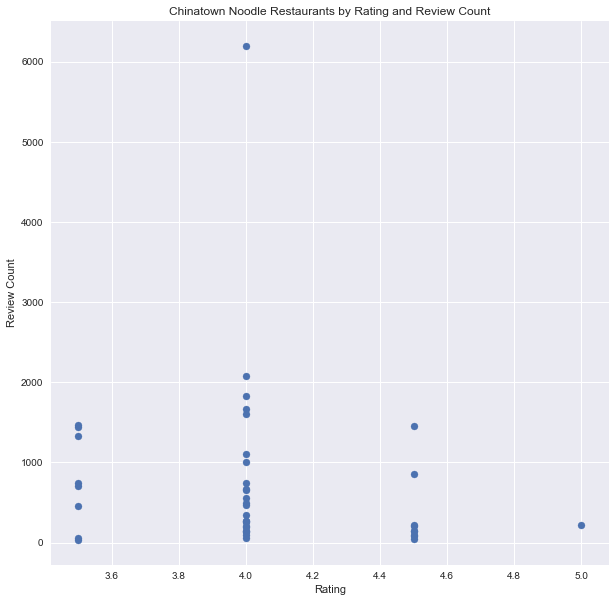

In [110]:
# you can do some analysis and visualization from here on! 

# visualize the review count - what's the appropriate plot?
fig = plt.figure(figsize= (10,10))
plt.scatter(x= df.rating, y= df.review_count)
plt.title('Chinatown Noodle Restaurants by Rating and Review Count')
fig.add_axes()
ax = fig.add_subplot(111)
ax.set(xlabel= 'Rating', ylabel= 'Review Count')

In [107]:
# query the name of the axe throwing place with the highest review
df.groupby(['rating', 'review_count']).apply(filter(df['review_count'] > 1000, df.review_count)

SyntaxError: unexpected EOF while parsing (<ipython-input-107-6bef071eb805>, line 2)

In [ ]:
# migrate the cleaned data into a sql db

In [113]:
# can you do some other queries using sql/pandas?
df
#git ignore file- client id ref

,id,alias,name,image_url,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,phone,display_phone,distance
0,Lbs8QBRN1U7IYBo5Mcv-RQ,88-lan-zhou-handmade-noodle-new-york,88 Lan Zhou Handmade Noodle,https://s3-media2.fl.yelpcdn.com/bphoto/KPHH9k...,False,https://www.yelp.com/biz/88-lan-zhou-handmade-...,1834,"[{'alias': 'chinese', 'title': 'Chinese'}, {'a...",4.0,"{'latitude': 40.715504, 'longitude': -73.996752}",[],1,"{'address1': '40 Bowery St', 'address2': None,...",+16466830939,(646) 683-0939,67.208348
1,97q5nUQTuBo_h00XCxna2A,tasty-hand-pulled-noodles-new-york,Tasty Hand-Pulled Noodles,https://s3-media4.fl.yelpcdn.com/bphoto/S4YfmB...,False,https://www.yelp.com/biz/tasty-hand-pulled-noo...,1598,"[{'alias': 'chinese', 'title': 'Chinese'}, {'a...",4.0,"{'latitude': 40.7142, 'longitude': -73.99787}","[pickup, delivery]",1,"{'address1': '1 Doyers St', 'address2': '', 'a...",+12127911817,(212) 791-1817,227.896865
2,bnDfFdiCcPzhuNWUJORvLQ,noodle-village-new-york-7,Noodle Village,https://s3-media4.fl.yelpcdn.com/bphoto/TwBJ_7...,False,https://www.yelp.com/biz/noodle-village-new-yo...,1100,"[{'alias': 'chinese', 'title': 'Chinese'}, {'a...",4.0,"{'latitude': 40.714167, 'longitude': -73.998803}","[pickup, delivery]",1,"{'address1': '13 Mott St', 'address2': '', 'ad...",+12122330788,(212) 233-0788,269.974853
3,bT4CDzyhV-frXV6ijvXnvw,super-taste-new-york,Super Taste,https://s3-media3.fl.yelpcdn.com/bphoto/Y-rfOV...,False,https://www.yelp.com/biz/super-taste-new-york?...,561,"[{'alias': 'chinese', 'title': 'Chinese'}, {'a...",4.0,"{'latitude': 40.71513, 'longitude': -73.99341}",[],1,"{'address1': '26 Eldridge St', 'address2': Non...",+16462830999,(646) 283-0999,319.279084
4,d_TC6Om2EBTzHVm_lCgNtg,great-ny-noodle-town-new-york,Great NY Noodle Town,https://s3-media4.fl.yelpcdn.com/bphoto/agF2gS...,False,https://www.yelp.com/biz/great-ny-noodle-town-...,1334,"[{'alias': 'cantonese', 'title': 'Cantonese'},...",3.5,"{'latitude': 40.7150363828814, 'longitude': -7...","[pickup, delivery]",1,"{'address1': '28 Bowery', 'address2': '', 'add...",+12123490923,(212) 349-0923,120.334125
5,lynQoI3w_pzYfHGeuUU-Qg,shu-jiao-fu-zhou-cuisine-restaurant-new-york,Shu Jiao Fu Zhou Cuisine Restaurant,https://s3-media2.fl.yelpcdn.com/bphoto/EV10p_...,False,https://www.yelp.com/biz/shu-jiao-fu-zhou-cuis...,851,"[{'alias': 'chinese', 'title': 'Chinese'}]",4.5,"{'latitude': 40.7184290357839, 'longitude': -7...",[pickup],1,"{'address1': '118 Eldridge St', 'address2': No...",+12126252532,(212) 625-2532,507.141765
6,5tWpAFpF618KJxBhHJzF7g,e-noodle-粥麵館-chinatown-new-york,E Noodle 粥麵館 - Chinatown,https://s3-media4.fl.yelpcdn.com/bphoto/ywaBw8...,False,https://www.yelp.com/biz/e-noodle-%E7%B2%A5%E9...,90,"[{'alias': 'hkcafe', 'title': 'Hong Kong Style...",4.0,"{'latitude': 40.71379, 'longitude': -73.99731}","[pickup, delivery]",1,"{'address1': '5 Catherine St', 'address2': Non...",+12122268919,(212) 226-8919,252.757466
7,wdGMVLUzocmnl2tST0lheg,yunshang-rice-noodle-house-new-york-5,YunShang Rice Noodle House,https://s3-media4.fl.yelpcdn.com/bphoto/8iXMXn...,False,https://www.yelp.com/biz/yunshang-rice-noodle-...,190,"[{'alias': 'chinese', 'title': 'Chinese'}, {'a...",4.0,"{'latitude': 40.71525, 'longitude': -73.99765}",[],2,"{'address1': '53 Bayard St', 'address2': None,...",+16469985223,(646) 998-5223,122.949100
8,SMImQM_JfZkIZwflTgOAoQ,yi-ji-shi-mo-noodle-corp-new-york-5,Yi Ji Shi Mo Noodle Corp,https://s3-media2.fl.yelpcdn.com/bphoto/iwzVDs...,False,https://www.yelp.com/biz/yi-ji-shi-mo-noodle-c...,93,"[{'alias': 'chinese', 'title': 'Chinese'}]",4.5,"{'latitude': 40.71824, 'longitude': -73.99583}",[],1,"{'address1': '88 Elizabeth St', 'address2': ''...",+16462336311,(646) 233-6311,250.363980
9,LztkKM-lvRraBbS9TVXzcg,yiwanmen-new-york-2,Yiwanmen,https://s3-media4.fl.yelpcdn.com/bphoto/34rPXH...,False,https://www.yelp.com/biz/yiwanmen-new-york-2?a...,145,"[{'alias': 'noodles', 'title': 'Noodles'}, {'a...",4.0,"{'latitude': 40.71931327392

#### Resources
- [Getting Data from Reddit API](https://www.storybench.org/how-to-scrape-reddit-with-python/)
- [Twitch API](https://dev.twitch.tv/docs)